## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import tensorflow_probability as tfp
tfd = tfp.distributions

from src.ClusteredGPR import ClusteredGPR

## Example:
Loading the csv-[file](https://github.com/ChihLi/GPcluster/blob/master/inst/extdata/GL2009.csv) from the [repo](https://github.com/ChihLi/GPcluster) associated with that paper.

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/ChihLi/GPcluster/master/inst/extdata/GL2009.csv')

In [3]:
xcols= ['X']
ycol= 'Y'

x_train = np.array(df[xcols]).astype(np.float64)
y_train = np.array(df[ycol]).astype(np.float64)

x_test= np.linspace(0.5,20, 40).reshape((40,1))

### Comparing results with and without clustering.

For more details on setting the priors, please refer to [TFP Guide&Tutorials/examples](https://www.tensorflow.org/probability/examples/Gaussian_Process_Regression_In_TFP).

#### No clustering (ie. 1 cluster)

In [4]:
GPReg = ClusteredGPR(x_train, y_train, numK=1, max_em_iter=20, num_samples = 100,
                     gpr_amplitude_prior = tfd.LogNormal(loc=0.3, scale=np.float64(0.5)),
                     gpr_length_scale_prior = tfd.LogNormal(loc=2., scale=np.float64(1.0)),
                     gpr_observation_noise_variance_prior = None,
                     gpr_num_results = 1000,
                     gpr_num_burnin_steps = 500,
                    )
GPReg.fit()

#### 2 clusters

In [5]:
CGPReg = ClusteredGPR(x_train, y_train, numK=2, max_em_iter=20, num_samples = 100,
                      gpr_amplitude_prior = tfd.LogNormal(loc=0.3, scale=np.float64(0.5)),
                      gpr_length_scale_prior = tfd.LogNormal(loc=2., scale=np.float64(1.0)),
                      gpr_observation_noise_variance_prior = None,
                      gpr_num_results = 1000,
                      gpr_num_burnin_steps = 500,
                     )
CGPReg.fit()

ITER= 0
z= [1 1 1 1 1 1 1 1 0 0 0]


#### playback and plot model:

In [6]:
y_noClus_samples= GPReg.predict_samples(x_test, 100)
y_2Clus_samples= CGPReg.predict_samples(x_test)

Model playback is plotted as errorbars at 15.73 percentile, 50 percentile (or median), 84.27 percentile. 

15.73 %-ile and 84.27 %-ile points are equivalent to 1 sigma in a normal distribution.

In [7]:
y_noClus_q50= np.quantile(y_noClus_samples, 0.5,axis=0)
y_noClus_q1= np.quantile(y_noClus_samples, 0.1573 ,axis=0)
y_noClus_q3= np.quantile(y_noClus_samples, 0.8427 ,axis=0)
lower_err_noClus= y_noClus_q50 - y_noClus_q1
upper_err_noClus= y_noClus_q3 - y_noClus_q50

y_2Clus_q50= np.quantile(y_2Clus_samples, 0.5,axis=0)
y_2Clus_q1= np.quantile(y_2Clus_samples, 0.1573 ,axis=0)
y_2Clus_q3= np.quantile(y_2Clus_samples, 0.8427 ,axis=0)
lower_err_2Clus= y_2Clus_q50 - y_2Clus_q1
upper_err_2Clus= y_2Clus_q3 - y_2Clus_q50

<IPython.core.display.Javascript object>


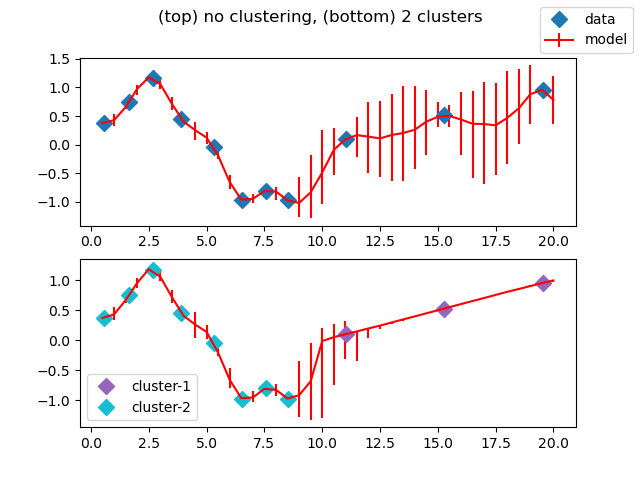

In [8]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('(top) no clustering, (bottom) 2 clusters')

ax1.plot(df['X'], df['Y'], 'D', markersize= 8, label= 'data')
ax1.errorbar(x_test, y_noClus_q50, yerr=[lower_err_noClus, upper_err_noClus], color= 'r', ecolor='r', label= 'model')

df_c0= df.iloc[CGPReg.Pk[0]]
df_c1= df.iloc[CGPReg.Pk[1]]
ax2.plot(df_c0['X'], df_c0['Y'], 'D', color='tab:purple', markersize= 8, label= 'cluster-1')
ax2.plot(df_c1['X'], df_c1['Y'], 'D', color='tab:cyan',markersize= 8, label= 'cluster-2', )
ax2.errorbar(x_test, y_2Clus_q50, yerr=[lower_err_2Clus, upper_err_2Clus], color= 'r', ecolor='r', )
ax2.legend()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels)

### Noisy observations

#### No clustering (or 1 cluster)

In [9]:
GPReg = ClusteredGPR(x_train, y_train, numK=1, max_em_iter=20, num_samples = 100,
                     gpr_amplitude_prior = tfd.LogNormal(loc=0.3, scale=np.float64(0.5)),
                     gpr_length_scale_prior = tfd.LogNormal(loc=2., scale=np.float64(1.0)),
                     gpr_observation_noise_variance_prior = tfd.LogNormal(loc=0, scale=np.float64(2.)),
                     gpr_num_results = 1000,
                     gpr_num_burnin_steps = 500,
                    )
GPReg.fit()

#### 2 clusters

In [10]:
CGPReg = ClusteredGPR(x_train, y_train, numK=2, max_em_iter=20, num_samples = 100,
                      gpr_amplitude_prior = tfd.LogNormal(loc=0.3, scale=np.float64(0.5)),
                      gpr_length_scale_prior = tfd.LogNormal(loc=2., scale=np.float64(1.0)),
                      gpr_observation_noise_variance_prior = tfd.LogNormal(loc=0, scale=np.float64(2.)),
                      gpr_num_results = 1000,
                      gpr_num_burnin_steps = 500,
                     )
CGPReg.fit()

ITER= 0
z= [1 1 1 1 1 1 1 1 0 0 0]


#### playback and plot model:

In [11]:
y_noClus_samples= GPReg.predict_samples(x_test, 100)
y_2Clus_samples= CGPReg.predict_samples(x_test)

In [12]:
y_noClus_q50= np.quantile(y_noClus_samples, 0.5,axis=0)
y_noClus_q1= np.quantile(y_noClus_samples, 0.1573 ,axis=0)
y_noClus_q3= np.quantile(y_noClus_samples, 0.8427 ,axis=0)
lower_err_noClus= y_noClus_q50 - y_noClus_q1
upper_err_noClus= y_noClus_q3 - y_noClus_q50

y_2Clus_q50= np.quantile(y_2Clus_samples, 0.5,axis=0)
y_2Clus_q1= np.quantile(y_2Clus_samples, 0.1573 ,axis=0)
y_2Clus_q3= np.quantile(y_2Clus_samples, 0.8427 ,axis=0)
lower_err_2Clus= y_2Clus_q50 - y_2Clus_q1
upper_err_2Clus= y_2Clus_q3 - y_2Clus_q50

<IPython.core.display.Javascript object>


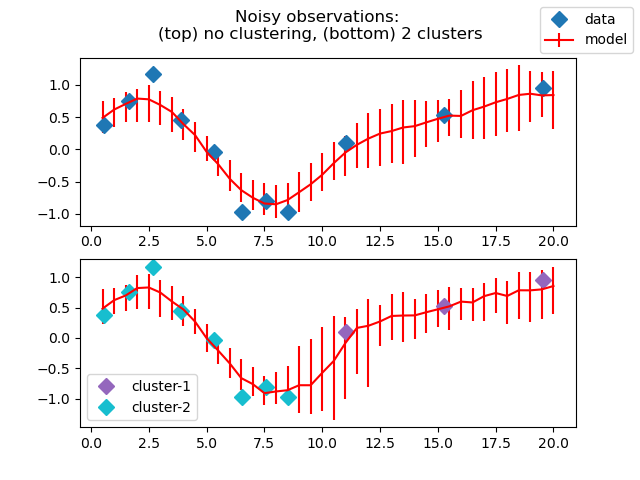

In [13]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Noisy observations: \n(top) no clustering, (bottom) 2 clusters')

ax1.plot(df['X'], df['Y'], 'D', markersize= 8, label= 'data')
ax1.errorbar(x_test, y_noClus_q50, yerr=[lower_err_noClus, upper_err_noClus], color= 'r', ecolor='r', label= 'model')

df_c0= df.iloc[CGPReg.Pk[0]]
df_c1= df.iloc[CGPReg.Pk[1]]
ax2.plot(df_c0['X'], df_c0['Y'], 'D', color='tab:purple', markersize= 8, label= 'cluster-1')
ax2.plot(df_c1['X'], df_c1['Y'], 'D', color='tab:cyan',markersize= 8, label= 'cluster-2', )
ax2.errorbar(x_test, y_2Clus_q50, yerr=[lower_err_2Clus, upper_err_2Clus], color= 'r', ecolor='r', )
ax2.legend()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels)

Similar with the exact GP regression case, the uncertainties of test points within the clusters are smaller in the *2-clusters* case. But those near the cluster transition may not necessarily decrease.